In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [22]:
data = pd.read_csv('expresso_processed.csv')
data.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [23]:
ds = data.copy()
ds.head()

,Unnamed: 0,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


In [24]:
cat = ds.select_dtypes(exclude = 'number')
num = ds.select_dtypes(include = 'number')

print('Categorical Data')
display(cat.head())
print('Numerical Data')
display(num.head())

Categorical Data


,TENURE,MRG
0,K > 24 month,NO
1,K > 24 month,NO
2,K > 24 month,NO
3,I 18-21 month,NO
4,K > 24 month,NO


Numerical Data


,Unnamed: 0,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,REGULARITY,CHURN
0,0,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,32,1
1,1,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,29,1
2,2,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,49,1
3,3,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,1,1
4,4,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,21,1


In [25]:
ds.drop('Unnamed: 0', axis = 1, inplace = True)
ds.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,K > 24 month,3000.0,4.0,3002.0,1001.0,8.0,266.0,1.0,NO,32,1
1,K > 24 month,1500.0,3.0,1980.0,660.0,5.0,4341.0,1.0,NO,29,1
2,K > 24 month,9850.0,32.0,9639.0,3213.0,38.0,2700.0,4.0,NO,49,1
3,I 18-21 month,1000.0,2.0,999.0,333.0,2.0,763.0,8.0,NO,1,1
4,K > 24 month,1200.0,3.0,1180.0,393.0,3.0,2955.0,28.0,NO,21,1


<Axes: xlabel='CHURN', ylabel='count'>

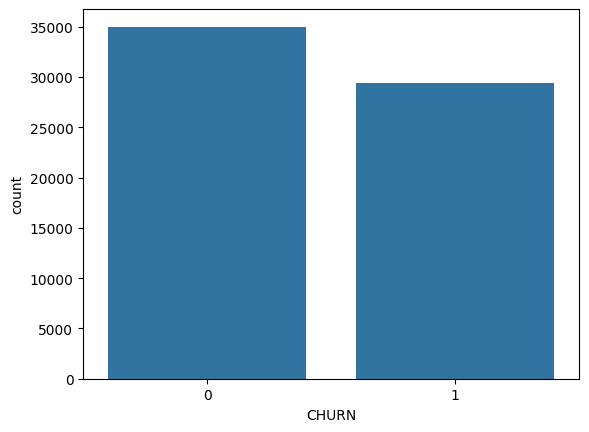

In [26]:
sns.countplot(x = ds['CHURN'])

In [27]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import joblib

encoded = {}

for i in cat:   
    encoder = LabelEncoder()
    ds[i] = encoder.fit_transform(ds[i]) 
    encoded[i + '_encoder'] = encoder 
    joblib.dump(encoder, open(f'{i}_encoder.pkl', 'wb'))

encoded

{'TENURE_encoder': LabelEncoder(), 'MRG_encoder': LabelEncoder()}

In [28]:
tobeScaled = ['MONTANT', 'REVENUE','ARPU_SEGMENT', 'DATA_VOLUME']
scaled = {}

for i in tobeScaled:
    scaler = StandardScaler()
    ds[i] = scaler.fit_transform(ds[[i]])
    scaled[i + '_scaled'] = scaler
    joblib.dump(scaler, open(f'{i}_scaler.pkl','wb'))

scaled

{'MONTANT_scaled': StandardScaler(),
 'REVENUE_scaled': StandardScaler(),
 'ARPU_SEGMENT_scaled': StandardScaler(),
 'DATA_VOLUME_scaled': StandardScaler()}

In [29]:
ds.head()

,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,MRG,REGULARITY,CHURN
0,7,-0.304123,4.0,-0.314144,-0.314002,8.0,-0.380804,1.0,0,32,1
1,7,-0.525441,3.0,-0.461982,-0.461985,5.0,0.138867,1.0,0,29,1
2,7,0.706564,32.0,0.645935,0.645934,38.0,-0.070404,4.0,0,49,1
3,5,-0.599214,2.0,-0.603890,-0.603892,2.0,-0.317423,8.0,0,1,1
4,7,-0.569705,3.0,-0.577707,-0.577854,3.0,-0.037885,28.0,0,21,1


In [31]:
x = ds.drop('CHURN', axis = 1)
y = ds.CHURN

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, train_size = 0.8, stratify = y, random_state = 45)

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

log_reg = LogisticRegression()

log_reg.fit(xtrain, ytrain)

# Model Evaluation
cross_validation = log_reg.predict(xtrain) 
print(classification_report(cross_validation, ytrain))

              precision    recall  f1-score   support

           0       0.78      0.79      0.79     27912
           1       0.75      0.74      0.74     23588

    accuracy                           0.77     51500
   macro avg       0.76      0.76      0.76     51500
weighted avg       0.77      0.77      0.77     51500



[Text(0, 0, '35000'), Text(0, 0, '29376')]

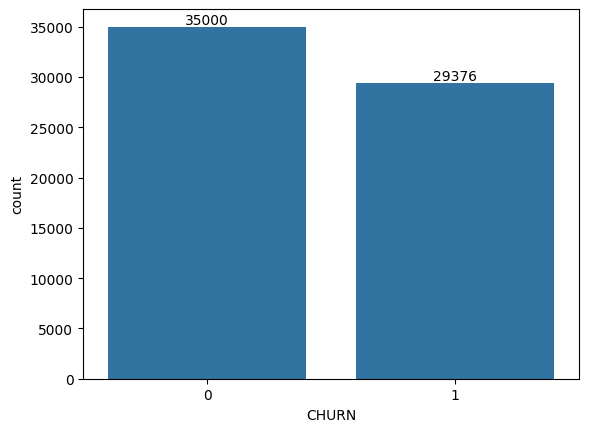

In [33]:
fig = sns.countplot(x = ds.CHURN)
fig.bar_label(fig.containers[0])

In [34]:
prediction = log_reg.predict(xtest) 
print(classification_report(prediction, ytest))

              precision    recall  f1-score   support

           0       0.78      0.78      0.78      6951
           1       0.75      0.74      0.74      5925

    accuracy                           0.76     12876
   macro avg       0.76      0.76      0.76     12876
weighted avg       0.76      0.76      0.76     12876



In [35]:
joblib.dump(log_reg, open('ExpressoChurnModel.pkl', 'wb'))